In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(998, 2) (998,)


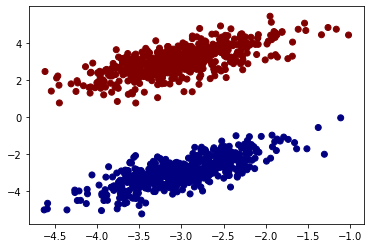

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)
flags = np.ones((1000) , dtype=np.bool_)
flags[[154 , 770]] = False
X = X[flags , :]
y = y[flags]
print(X.shape, y.shape)
y = np.where(y==0 , -1 , y)[: , None]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

In [3]:
class SVM:
    
    def __init__(self, in_features, n_iter=1000, eta=0.01, c=1., random_state=42):
        np.random.seed(random_state)
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        #self.w = np.zeros((in_features, 1))
        #self.b = 0
        self.n_iter = n_iter
        self.eta = eta
        self.c = c
        self.loss_hist = []
    
        
    def fit(self, X, y):
        # train loop
        for i in range(self.n_iter):
            y_hat = self.predict(X)
            # false predictions
            mask = np.squeeze((1 - y*y_hat) > 0)
            if mask.sum() == 0:
                print(i, 'break!')
                break
            loss = self._loss(y, y_hat, mask)
            grad_w, grad_b = self._grad(X, y, y_hat, mask)
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            self.loss_hist.append(loss.mean())
            
    def predict(self, x):
        return x @ self.w + self.b
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return self._accuracy(y, y_hat, t=0)
    
    def _accuracy(self, y, y_hat, t=0):
        y_hat = np.where(y_hat<t, -1, 1)
        acc = np.sum(y == y_hat) / len(y)
        return acc
    
    def _loss(self, y, y_hat, mask):
        y_mask = y[mask]
        y_hat_mask = y_hat[mask]
        return ((np.maximum(0, 1-y_mask*y_hat_mask))**2) + (0.5*self.c*np.linalg.norm(self.w)**2)

    
    def _grad(self, x, y, y_hat, mask):
        x_mask = x[mask]
        y_mask = y[mask]
        y_hat_mask = y_hat[mask]
        grad_w = ((-2*x_mask*y_mask)*self._loss(y, y_hat,mask)).mean(axis=0).reshape(self.w.shape) + self.c*self.w
        grad_b = ((-2*y_mask)*self._loss(y, y_hat,mask)).mean(axis=0)
    
        return grad_w, grad_b

In [4]:
model = SVM(in_features=2, n_iter=2000, eta=0.01, c = 0.01 , random_state=40)
model.fit(X, y)

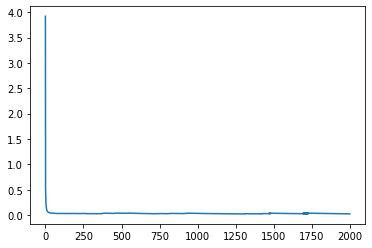

In [5]:
plt.plot(model.loss_hist)

In [6]:
model.score(X , y)

1.0

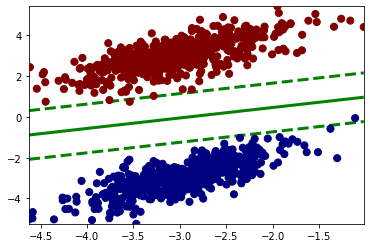

In [7]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)